# Proyecto Integrador Opción 2. (Mercado Automotor):
------------------

Se requiere crear un modelo de regresión capaz de pronosticar el precio de un vehículo a partir de las características del mismo. Dichas características corresponden por ejemplo al consumo de combustible, tamaño de motor, peso del vehículo, clilindraje, etc. de un dataset con datos recopilados en el mercado actual. A demás se requiere un modelo de clasificación que de acuerdo a sus características puedo determinar si el vehículo será gamma alta (vehículo costoso) o gamma baja (vehículo económico).

A continuación se realizan pruebas del modelo de supervisado machine learning KNN (K-Nearest-Neighbor) para la creación de ambos modelos.

#### Modelo KNN usando las variables con mayor correlación con el precio:

1. Importar Librerías necesarias para los modelos KNN-Clasificador y KNN-Regresor:

In [10]:
# Tratamientos de Datos:
#---------------------------------------------------------------------------------------
import pandas as pd
import numpy as np

# Librerías para el modelo KNN:
#----------------------------------------------------------------------------------------------------------------------------

# Para regresión y clasificación:
from sklearn.feature_selection import SelectKBest, f_classif                        # Reducción de variables
from sklearn.model_selection import train_test_split                                # Entrenamiento de modelos
from sklearn.preprocessing import StandardScaler                                    # Escalar valores numéricos
from sklearn.model_selection import GridSearchCV                                    # Búsqueda de mejores hiperparámetros

# Para clasificación:
from sklearn.neighbors import KNeighborsClassifier                                  # Modelo KNN para clasificación (vecinos más cercanos)
from sklearn.metrics import accuracy_score, recall_score                            # medidas de rendimiento
from sklearn.metrics import confusion_matrix                                        # medidas de rendimiento
import warnings                                                                     # Para ignorar advertencias

# Para regresión:
from sklearn.neighbors import KNeighborsRegressor                                   # Modelo KNN para regresión (vecinos más cercanos)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error       # medidas de rendimiento
from sklearn.feature_selection import f_regression                                  # Para buscar mejores parámetros

# Validación de los modelos (validación cruzada):
#----------------------------------------------------------------------------------------------------------------------------

from sklearn.model_selection import cross_val_score                                 # Validación cruzada
from sklearn.model_selection import LeaveOneOut                                     # Validación cruzada
from sklearn.model_selection import KFold                                           # Validación cruzada 

# Gráficos:
#----------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

2. Tratamiento de datos:
   
 Los datos han sido depurados desde el archivo "ETLPropuesta2.ipynb".
 Se tienen dos variables objetivo ('price' para el modelo de regresión y 'price_category' para el modelo de clasificación).

In [11]:
# Visualización:

#Se identifica que los datos numéricos están escalados y que está creada una categoría de precio que divide los vehículos entre Costosos y Económicos.

data = pd.read_csv('..\DatasetForML.csv')
data.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_OHCV,enginetype_ROTOR,fuelsystem_2BBL,fuelsystem_4BBL,fuelsystem_IDI,fuelsystem_MFI,fuelsystem_MPFI,fuelsystem_SPDI,fuelsystem_SPFI,price_category
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,1,0,0,1
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,1,0,0,1
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,1,0,0,0,0,0,1,0,0,1
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,1,0,0,1
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,1,0,0,1


In [12]:
print('Número de datos por encima de la mediana:', len(data[data['price'] > data['price'].median()]))
print('Número de datos igual a la mediana:', len(data[data['price'] == data['price'].median()]))
print('Número de datos por debajo de la mediana:', len(data[data['price'] < data['price'].median()]))

Número de datos por encima de la mediana: 102
Número de datos igual a la mediana: 1
Número de datos por debajo de la mediana: 102


<Axes: >

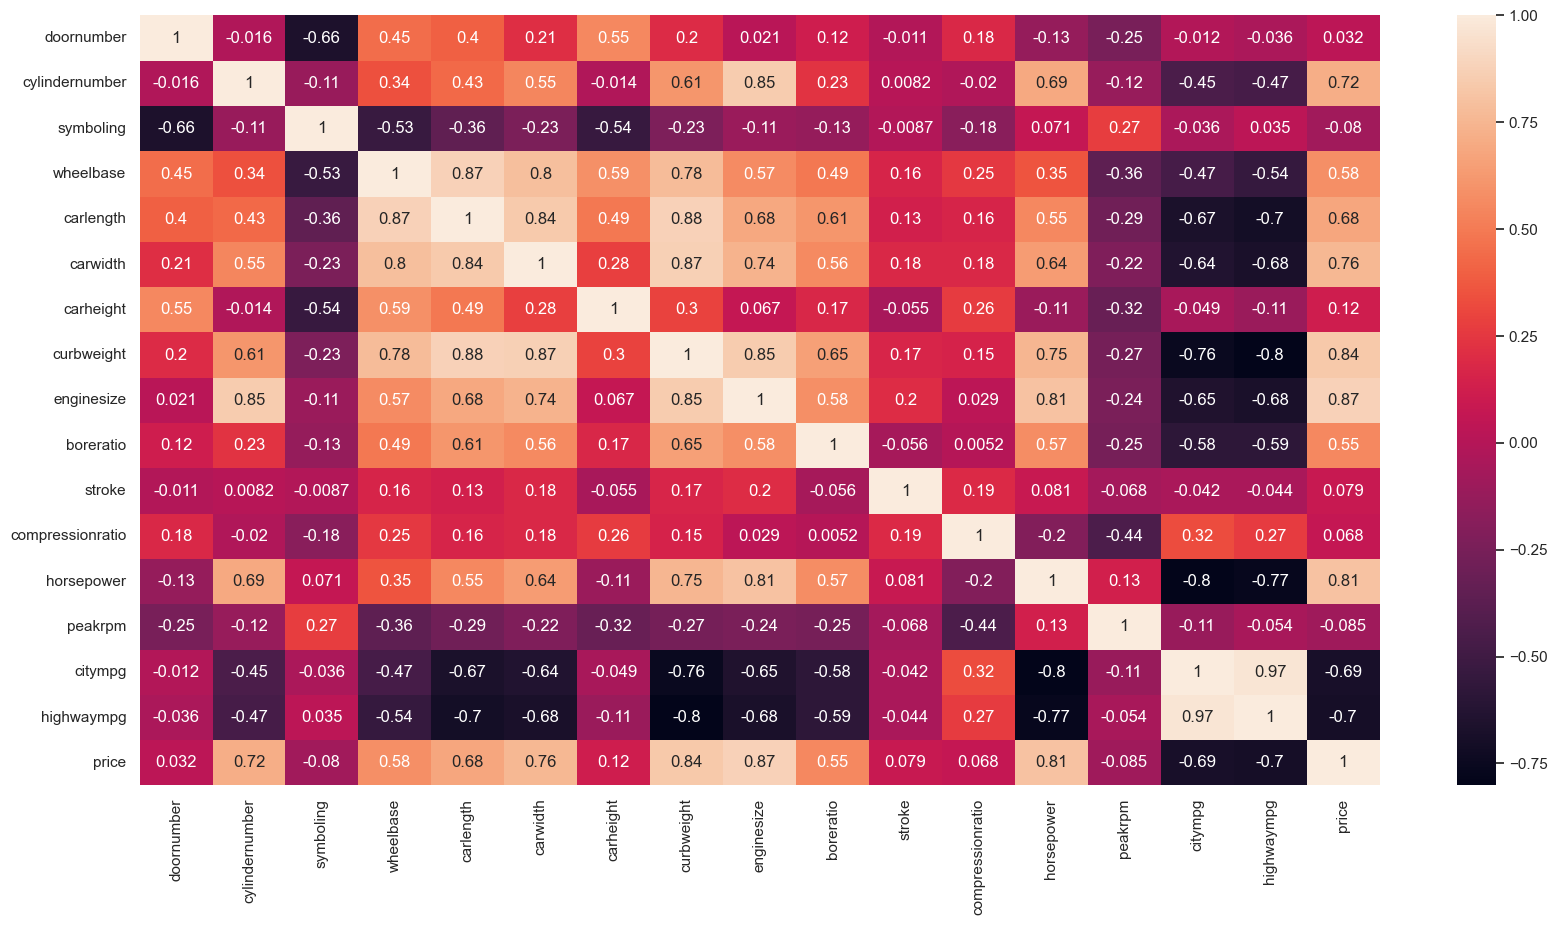

In [13]:
# Correlación de variables

columnas_numericas = ['doornumber', 'cylindernumber', 'symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
corr_coef = np.corrcoef(data[columnas_numericas].values.T)
plt.figure(figsize=(20, 10))
sns.set(font_scale=1)
sns.heatmap(
    corr_coef,
    annot=True,
    yticklabels=columnas_numericas,
    xticklabels=columnas_numericas
)

In [14]:
correlation_matrix = data.corr()
target_correlation = correlation_matrix['price']

# Excluir la correlación con la variable 'price' y consultar las varibles con mayor correlación con el precio
top_correlations = target_correlation.drop(['price','price_category']).abs().sort_values(ascending=False).head(10)

Mejor_Caracteristica = top_correlations.index[0]
Mejores_Caracteristicas = list(top_correlations.index)
print(top_correlations)
print('----------------------')

print('Mejor característica: ',Mejor_Caracteristica)
print('Mejore características: ',Mejores_Caracteristicas)
# Se obtiene la mejor característica.

enginesize        0.874145
curbweight        0.835305
horsepower        0.808139
carwidth          0.759325
cylindernumber    0.718305
highwaympg        0.697599
citympg           0.685751
carlength         0.682920
drivewheel_RWD    0.638957
drivewheel_FWD    0.601950
Name: price, dtype: float64
----------------------
Mejor característica:  enginesize
Mejore características:  ['enginesize', 'curbweight', 'horsepower', 'carwidth', 'cylindernumber', 'highwaympg', 'citympg', 'carlength', 'drivewheel_RWD', 'drivewheel_FWD']


In [15]:
correlation_matrix = data.corr()
target_correlation = correlation_matrix[Mejor_Caracteristica]

# Excluir la correlación con la variable 'price' y consultar las varibles con mayor correlación con el precio
top_corr_excluir = target_correlation.drop('price').abs().sort_values(ascending=False).head(5)

Caraceristicas_para_excluir = list(top_corr_excluir.index[1:6])
print(Caraceristicas_para_excluir)

# Se obtienen las variables con las correlaciones más altas.

# Ajustar la lista original eliminando las variables que están en la lista de correlación con 'enginesize'
filtered_top_correlations = [var for var in Mejores_Caracteristicas if var not in Caraceristicas_para_excluir]

print("\nVariables con mayor correlación con 'price' (sin las que están en 'enginesize'):")
print(filtered_top_correlations)

['curbweight', 'cylindernumber', 'horsepower', 'carwidth']

Variables con mayor correlación con 'price' (sin las que están en 'enginesize'):
['enginesize', 'highwaympg', 'citympg', 'carlength', 'drivewheel_RWD', 'drivewheel_FWD']


## MODELO DE CLASIFICACIÓN KNN:

3. División del dataset en características (x) y variable objetivo (y):

In [16]:
VARS = filtered_top_correlations
TARGET = ['price_category']

X = data[VARS]
y = data[TARGET]

4. División de datos de entrenamiento y testeo, escalamiento de datos:

In [17]:
# División de datos en conjuntos de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar el escalador y transformar las características de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transformar las características de prueba utilizando el mismo escalador
X_test_scaled = scaler.transform(X_test)


4. División de datos de entrenamiento y testeo, escalamiento de datos, reducción de dimensionalidad, ajuste de hiperparámetros y modelamiento:

In [18]:
warnings.filterwarnings('ignore') #Ignorar advertencias

# Definir el modelo
model = KNeighborsClassifier()

# Definir los hiperparámetros a ajustar y sus posibles valores
param_grid = {
    'n_neighbors': list(range(3, len(X_train)//2 + 1)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Realizar la búsqueda de cuadrícula
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='recall') # se cambia scoring='accuracy' por 'recall' para disminuir la exhaustividad
grid_search.fit(X_train_scaled, y_train)

# Obtener los mejores hiperparámetros y el modelo ajustado
best_params_grid = grid_search.best_params_
best_model_grid = grid_search.best_estimator_

# Imprimir los mejores parámetros encontrados con la búsqueda de cuadrícula
print("Mejores hiperparámetros (GridSearchCV):")
print(best_params_grid)

# Realizar predicciones en el conjunto de prueba con el mejor modelo de la búsqueda de cuadrícula
predictions_grid = best_model_grid.predict(X_test_scaled)

Mejores hiperparámetros (GridSearchCV):
{'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'uniform'}


In [19]:
print(best_params_grid)
print(f"Mejor precisión durante la validación cruzada: {grid_search.best_score_:.2f}")

{'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'uniform'}
Mejor precisión durante la validación cruzada: 0.91


5. Matrix de Confusión:

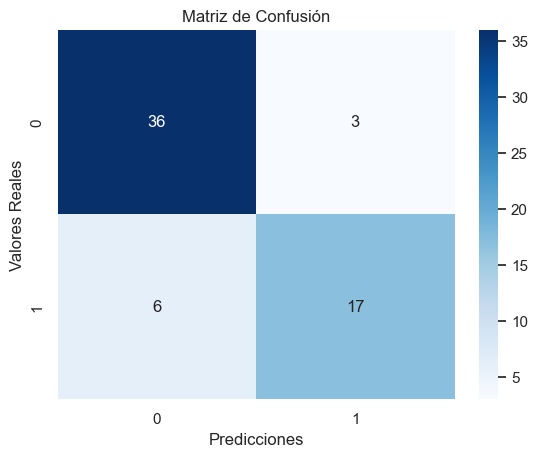

In [20]:
# Realizar predicciones en el conjunto de prueba con el mejor modelo de la búsqueda de cuadrícula
y_pred = best_model_grid.predict(X_test_scaled)


# Obtener la matriz de confusión para el conjunto de prueba
conf_matrix = confusion_matrix(y_test, y_pred)

# Crear un mapa de calor con seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

In [21]:
print('accuracy = ',accuracy_score(y_test, y_pred))
print('sensibilidad = ',recall_score(y_test, y_pred, pos_label = 1))
print('especificidad = ',recall_score(y_test, y_pred, pos_label = 0))

accuracy =  0.8548387096774194
sensibilidad =  0.7391304347826086
especificidad =  0.9230769230769231


6. Pronosticar un nuevo resultado de prueba:

In [22]:
#'enginesize', 'highwaympg', 'citympg', 'carlength', 'drivewheel_RWD', 'drivewheel_FWD'

# Supongamos que tienes una nueva entrada representada por una fila de características seleccionadas
nueva_entrada = [130, 27, 21, 168, 1, 0]  # Asegúrate de que tiene las mismas características y en el mismo orden que las características seleccionadas

# Escala las características seleccionadas
nueva_entrada_scaled = scaler.transform([nueva_entrada])

# Realiza la predicción con el modelo ajustado
prediccion = best_model_grid.predict(nueva_entrada_scaled)

# Imprime la predicción
print("Predicción para la nueva entrada:", prediccion)

Predicción para la nueva entrada: [1]


In [23]:
data[['enginesize', 'highwaympg', 'citympg', 'carlength', 'drivewheel_RWD', 'drivewheel_FWD','price_category']].iloc[1]

enginesize        130.0
highwaympg         27.0
citympg            21.0
carlength         168.8
drivewheel_RWD      1.0
drivewheel_FWD      0.0
price_category      1.0
Name: 1, dtype: float64

7. Validación cruzada LOOCV:

In [24]:
loo = LeaveOneOut()
accuracy_scores_loo = cross_val_score(best_model_grid, X_test, y_test, cv=loo, scoring='accuracy')

In [25]:
# Datos de la validación:

print("Puntuaciones de Precisión LOOCV:")
print(accuracy_scores_loo)

# Imprimir la Precisión Promedio
average_accuracy_loo = accuracy_scores_loo.mean()
print(f'Precisión promedio LOOCV: {average_accuracy_loo:.2f}')

Puntuaciones de Precisión LOOCV:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.]
Precisión promedio LOOCV: 0.87


1. Resumen del modelo de clasificación:

| characteristic  | detail |
|-----------------|--------------------|
| Modelo          | K_Nearest_Neighbor |
| n_neighbors     | 9                 |
| weights         | uniform           |
| accuracy        | 0.85               |
| sensibilidad    | 0.74               |
| especificidad   | 0.92               |
| validación LOOCV   | 0.87              |

*Nota:* `n_neighbors` (k) optimizado mediante grid_search sobre la valoración de 3 hasta la mitad de los registros.


## MODELO DE REGRESIÓN KNN:

9. División del dataset en características 'x' y variable objetivo 'y':

In [26]:
VARSr = filtered_top_correlations
       
TARGETr = ['price']

Xr = data[VARSr]
yr = data[TARGETr]

División de datos de entrenamiento y testeo, escalamiento de datos:

In [27]:
# División de datos en conjuntos de entrenamiento y prueba:
X_trainr, X_testr, y_trainr, y_testr = train_test_split(Xr, yr, test_size=0.3, random_state=123)

# Inicializar el escalador
scaler_r = StandardScaler()

# Ajustar el escalador y transformar las características de entrenamiento
X_train_scaledr = scaler_r.fit_transform(X_trainr)

# Transformar las características de prueba utilizando el mismo escalador
X_test_scaledr = scaler_r.transform(X_testr)


10. División de datos de entrenamiento y testeo, escalamiento de datos, reducción de dimensionalidad, ajuste de hiperparámetros y modelamiento:

In [28]:
# Definir el modelo
model_r = KNeighborsRegressor()

# Definir los hiperparámetros a ajustar y sus posibles valores
param_gridr= {
    'n_neighbors': list(range(3, len(X_trainr)//2 + 1)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Realizar la búsqueda de cuadrícula
grid_searchr = GridSearchCV(model_r, param_gridr, cv=5, scoring='neg_mean_squared_error')
grid_searchr.fit(X_train_scaledr, y_trainr)

# Obtener los mejores hiperparámetros y el modelo ajustado
best_params_gridr = grid_searchr.best_params_
best_model_gridr = grid_searchr.best_estimator_

# Imprimir los mejores parámetros encontrados con la búsqueda de cuadrícula
print("Mejores hiperparámetros (GridSearchCV):")
print(best_params_gridr)

# Realizar predicciones en el conjunto de prueba con el mejor modelo de la búsqueda de cuadrícula
predictions_gridr = best_model_gridr.predict(X_test_scaledr)

best_model_gridr

Mejores hiperparámetros (GridSearchCV):
{'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'distance'}


KNeighborsRegressor(algorithm='ball_tree', weights='distance')

In [29]:
# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros (GridSearchCV - Regresión):")
print(best_params_gridr)

# Imprimir la mejor puntuación durante la validación cruzada (neg_mean_squared_error)
print(f"Mejor puntuación durante la validación cruzada: {grid_searchr.best_score_:.2f}")


Mejores hiperparámetros (GridSearchCV - Regresión):
{'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'distance'}
Mejor puntuación durante la validación cruzada: -7762139.09


11. Evaluación del modelo correlación (R^2) entre los valores reales del testeo y las predicciones:

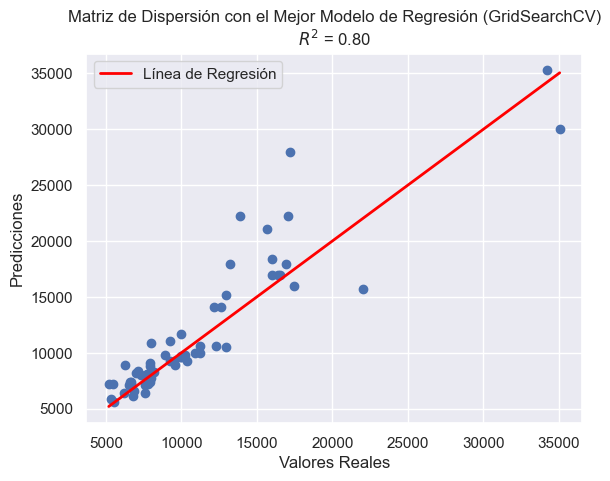

In [30]:
# Realizar predicciones en el conjunto de prueba con el mejor modelo de la búsqueda de cuadrícula
y_predr = best_model_gridr.predict(X_test_scaledr)

# Convertir los datos a tipo numérico si es necesario
y_testr = y_testr.astype(float)
predictions_regression = y_predr.astype(float)

# Calcular el coeficiente de determinación R^2
r2 = r2_score(y_testr, predictions_regression)

# Crear una línea de regresión
line = np.arange(min(y_testr['price']), max(y_testr['price']), 1)
line = line.reshape(-1, 1)
#regression_line = best_model_grid_regressor.predict(scalerr.transform(line))

# Visualizar la matriz de dispersión con la línea de regresión y el R^2
plt.scatter(y_testr, predictions_regression)
plt.plot(line, line, color='red', linewidth=2, label='Línea de Regresión')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title(f'Matriz de Dispersión con el Mejor Modelo de Regresión (GridSearchCV)\n$R^2$ = {r2:.2f}')
plt.legend()
plt.show()




12. Pronosticar un nuevo dato de prueba:

In [31]:
#'enginesize', 'highwaympg', 'citympg', 'carlength', 'drivewheel_RWD', 'drivewheel_FWD'

# Supongamos que tienes una nueva entrada representada por una fila de características seleccionadas
nueva_entradar = [130, 27, 21, 168, 1, 0]  # Asegúrate de que tiene las mismas características y en el mismo orden que las características seleccionadas

# Escala las características seleccionadas
nueva_entrada_scaledr = scaler.transform([nueva_entradar])

# Realiza la predicción con el modelo ajustado
prediccionr = best_model_gridr.predict(nueva_entrada_scaledr)

# Imprime la predicción
print("Predicción para la nueva entrada:", prediccionr)

Predicción para la nueva entrada: [[15040.33997118]]


In [32]:
data[['enginesize', 'highwaympg', 'citympg', 'carlength', 'drivewheel_RWD', 'drivewheel_FWD']].iloc[0]

enginesize        130.0
highwaympg         27.0
citympg            21.0
carlength         168.8
drivewheel_RWD      1.0
drivewheel_FWD      0.0
Name: 0, dtype: float64

13. Resumen métricas de evaluación del modelo de regresión:

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_testr, predictions_regression)

# Calcular la raíz cuadrada del error cuadrático medio (RMSE)
rmse = np.sqrt(mse)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_testr, predictions_regression)

# Calcular el coeficiente de determinación R^2
r2 = r2_score(y_testr, predictions_regression)

# Imprimir las métricas
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Raíz Cuadrada del Error Cuadrático Medio (RMSE): {rmse:.2f}")
print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Coeficiente de Determinación (R^2): {r2:.2f}")


Error Cuadrático Medio (MSE): 6511452.22
Raíz Cuadrada del Error Cuadrático Medio (RMSE): 2551.75
Error Absoluto Medio (MAE): 1563.53
Coeficiente de Determinación (R^2): 0.80


14. Validación Cruzada 'neg_mean_squared_error':

In [34]:
loo = LeaveOneOut()
mse_scores_loo = cross_val_score(best_model_gridr, X_test_scaledr, y_testr, cv=loo, scoring='neg_mean_squared_error')

# Convertir las puntuaciones de error cuadrático medio negativo a positivo
mse_scores_loo = -mse_scores_loo

# Imprimir las puntuaciones de MSE LOOCV
print("Puntuaciones de MSE LOOCV:")
print(mse_scores_loo)

# Calcular el MSE promedio
average_mse_loo = mse_scores_loo.mean()
print(f'MSE promedio LOOCV: {average_mse_loo:.2f}')


Puntuaciones de MSE LOOCV:
[5.76901778e+05 1.97964298e+08 1.03362250e+07 8.73481264e+05
 2.11159141e+07 1.32573026e+05 9.74798693e+05 1.89585192e+05
 1.32250000e+06 3.94806620e+03 8.61343257e+04 2.98970934e+06
 1.75241201e+03 1.26600890e+06 2.58278629e+06 1.48690962e+05
 2.38405899e+04 1.38827326e+05 6.78150779e+05 8.26874474e+04
 4.31046395e+07 5.33078854e+06 2.49907629e+06 5.04566085e+05
 1.36900000e+07 4.38262478e+06 8.21270034e+06 0.00000000e+00
 1.87930248e+08 9.60106599e+04 2.06980368e+06 1.22500000e+05
 4.81190252e+06 1.22500000e+05 1.54498494e+07 1.90398027e+06
 1.32250000e+06 1.90440000e+06 8.02445299e+05 1.01047287e+07
 1.05714613e+05 2.80900000e+05 1.36900000e+07 2.49436510e+06
 4.59632766e+07 6.93540659e+05 1.00007739e+05 1.41238020e+06
 1.16687362e+07 1.26056531e+06 2.80900000e+05 6.19341545e+04
 1.90440000e+06 1.03362250e+07 6.04394862e+07 1.69936133e+02
 0.00000000e+00 1.12353910e+06 1.77198159e+07 1.26097515e+07
 1.21982051e+03 6.91585335e+04]
MSE promedio LOOCV: 117430

15. Resumen del modelo de regresión:

| characteristic  | detail |
|-----------------|--------------------|
| Modelo          | K_Nearest_Neighbor |
| n_neighbors     | 5                  |
| weights         | distance           |
| algorithm       | ball_tree          |
| scoring_type    | neg_mean_squared_error|
| scoring_value   | -7762139.09|
| MSE   |6511452.22|
| RMSE   |2551.75|
| MAE   |1563.53|
| R^2 (texts vs Predictions) |0.80|
| MSE (validación cruzada - texts) |11743067.17|

*Nota:* `n_neighbors` (k) optimizado mediante grid_search sobre la valoración de 3 hasta la mitad de los registros.


scoring='neg_mean_squared_error'